PCA on Unsupervised Learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
df=pd.read_excel("University_Clustering.xlsx")

In [ ]:
df

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90
5,Dartmouth,NH,1340,89,23,10,32162,95
6,Duke,NC,1315,90,30,12,31585,95
7,Georgetown,DC,1255,74,24,12,20126,92
8,Harvard,MA,1400,91,14,11,39525,97
9,JohnsHopkins,MD,1305,75,44,7,58691,87


In [ ]:
df.drop("State",axis=1,inplace=True)

In [ ]:
df.shape

(25, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [ ]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [ ]:
df_new=df.drop("Univ",axis=1)
df_new

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
for col in df_new:
  ss=StandardScaler()
  df_new[col]=ss.fit_transform(df_new[[col]])

In [ ]:
df_new.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


In [ ]:
wcss=[]
clusters=list(range(1,9))
for k in clusters:
  model=KMeans(n_clusters=k)
  model.fit(df_new)
  wcss.append(model.inertia_)

In [ ]:
wcss

[150.0,
 64.1452839501027,
 44.531761731450956,
 33.654341806512235,
 26.785713479514527,
 22.704584217335714,
 18.56891703085987,
 16.057428074500915]

In [ ]:
clusters

[1, 2, 3, 4, 5, 6, 7, 8]

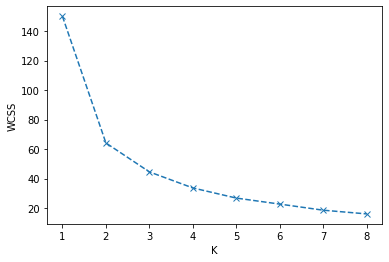

In [ ]:
plt.figure()
plt.plot(clusters,wcss,'x--')
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()

In [ ]:
model=KMeans(n_clusters=3)
model.fit(df_new)

KMeans(n_clusters=3)

In [ ]:
model.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0], dtype=int32)

In [ ]:
df["labels"]=model.labels_

In [ ]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [ ]:
df.groupby("labels").mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
labels,,,,,,
0,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333


In [ ]:
df[df["labels"]==0]["Univ"]

1          CalTech
5        Dartmouth
6             Duke
8          Harvard
9     JohnsHopkins
10             MIT
14       Princeton
16        Stanford
24            Yale
Name: Univ, dtype: object

In [ ]:
df[df["labels"]==1]["Univ"]

13     PennState
15        Purdue
17      TexasA&M
23    UWisconsin
Name: Univ, dtype: object

In [ ]:
df[df["labels"]==2]["Univ"]

0            Brown
2              CMU
3         Columbia
4          Cornell
7       Georgetown
11    Northwestern
12       NotreDame
18      UCBerkeley
19        UChicago
20       UMichigan
21           UPenn
22             UVA
Name: Univ, dtype: object

In [ ]:
from sklearn.decomposition import PCA
pc=PCA(n_components=3,random_state=1)

In [ ]:
components=pc.fit_transform(df_new)

In [ ]:
components

array([[-1.00987445, -1.06430962,  0.08106631],
       [-2.82223781,  2.25904458,  0.83682883],
       [ 1.11246577,  1.63120889, -0.26678684],
       [-0.74174122, -0.04218747,  0.06050086],
       [-0.31191206, -0.63524357,  0.01024052],
       [-1.69669089, -0.34436328, -0.25340751],
       [-1.24682093, -0.49098366, -0.03209382],
       [-0.33874978, -0.78516859, -0.49358483],
       [-2.37415013, -0.38653888,  0.11609839],
       [-1.40327739,  2.11951503, -0.44282714],
       [-1.72610332,  0.08823712,  0.17040366],
       [-0.45085748, -0.01113295, -0.17574605],
       [ 0.04023814, -1.00920438, -0.49651717],
       [ 3.23373034, -0.37458049, -0.49537282],
       [-2.23626502, -0.37179329, -0.39899365],
       [ 5.17299212,  0.77991535, -0.38591233],
       [-1.69964377, -0.30559745,  0.31850785],
       [ 4.578146  , -0.34759136,  1.49964176],
       [ 0.82260312, -0.69890615,  1.42781145],
       [-0.09776213,  0.65044645,  0.10050844],
       [ 1.9631826 , -0.22476756, -0.255

In [ ]:
# extracting above components
pc1=components[:,0]
pc2=components[:,1]
pc3=components[:,2]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


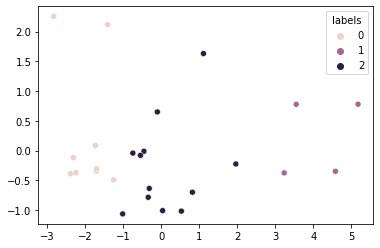

In [ ]:
plt.figure()
sns.scatterplot(pc1,pc2,hue=df['labels'])
plt.show()

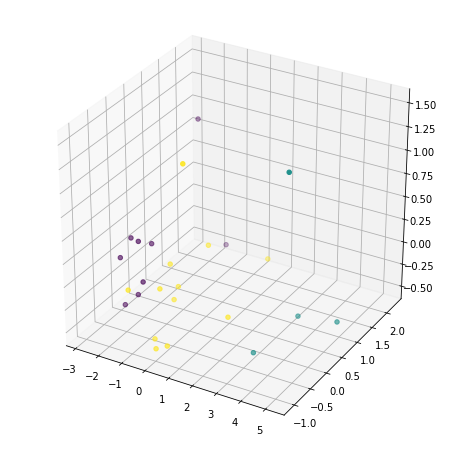

In [ ]:
# now 3d plotting
fig=plt.figure(figsize=(8,8))
ax=plt.axes(projection='3d')
ax.scatter(pc1,pc2,pc3,c=df['labels'])
plt.show()

PCA on Supervised Learning .. Let's say Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [ ]:
df.shape

(1338, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [ ]:
#check data balance
df["insuranceclaim"].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [ ]:
#train test split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
log.score(X_test,y_test)

0.8059701492537313

In [ ]:
y_pred = log.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       157
           1       0.82      0.87      0.84       245

    accuracy                           0.81       402
   macro avg       0.80      0.79      0.79       402
weighted avg       0.80      0.81      0.80       402



In [ ]:

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [ ]:
print(tp,fp)
print(fn,tn)

212 45
33 112


In [ ]:
#age	sex	bmi	children	smoker	region	charges
output=log.predict(np.array([20,1,33,1,0,3,1725.55230]).reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
if output[0]==1:
  print("Claim")
else:
  print("No claim")

Claim


Now this time rather than using features we will use principal components.

Now, we have not scaled the data. If u want , u can scale the data, and then apply principal component.

In [ ]:
import pickle

In [ ]:
file=open("log.pkl","wb")
pickle.dump(log,file)
file.close

<function BufferedWriter.close>

In [ ]:
from sklearn.decomposition import PCA
pc=PCA(n_components=3,random_state=1)

In [ ]:
X_train_pc=pc.fit_transform(X_train)

In [ ]:
X_test_pc=pc.transform(X_test)

In [ ]:
model_pc=LogisticRegression(random_state=1)
model_pc.fit(X_train_pc,y_train)

LogisticRegression(random_state=1)

In [ ]:
y_pred=model_pc.predict(X_test_pc)

In [ ]:
print(classification_report(y_pred,y_test)) # score is low because we are using only 3 PCs

              precision    recall  f1-score   support

           0       0.62      0.59      0.61       165
           1       0.73      0.75      0.74       237

    accuracy                           0.69       402
   macro avg       0.68      0.67      0.67       402
weighted avg       0.68      0.69      0.69       402

